In [1]:
#Loaded Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#Imported Cleaned Housing and CPI Data
df = pd.read_csv(Path('./median_house_and_CPI.csv'))
df.head()

,Unnamed: 0,Year,County,Median_House_Price,CPI-U
0,0,1990,CA,193096.2,135.0
1,1,1991,CA,200736.8,140.6
2,2,1992,CA,196947.5,145.6
3,3,1993,CA,188352.5,149.4
4,4,1994,CA,184345.2,151.5


In [3]:
#Checked Data Types
df.dtypes

Unnamed: 0              int64
Year                    int64
County                 object
Median_House_Price    float64
CPI-U                 float64
dtype: object

In [4]:
#Dropped Column named "Unnamed: 0", Renamed Columns, and Set Year as Index
df_update = df.drop(['Unnamed: 0'], axis =1).set_index('Year').rename(columns={'County': 'Georgraphical_Area', 'Median_House_Price' : 'Avg_House_Price'})
df_update.head()

,Georgraphical_Area,Avg_House_Price,CPI-U
Year,,,
1990,CA,193096.2,135.0
1991,CA,200736.8,140.6
1992,CA,196947.5,145.6
1993,CA,188352.5,149.4
1994,CA,184345.2,151.5


In [5]:
#Checked Data Types Again in Preperation for Setting up SQL DB
df_update.dtypes

Georgraphical_Area     object
Avg_House_Price       float64
CPI-U                 float64
dtype: object

In [6]:
#Reset Index So Year would be Its own column
df_final = df_update.reset_index()
df_final.head()

,Year,Georgraphical_Area,Avg_House_Price,CPI-U
0,1990,CA,193096.2,135.0
1,1991,CA,200736.8,140.6
2,1992,CA,196947.5,145.6
3,1993,CA,188352.5,149.4
4,1994,CA,184345.2,151.5


In [7]:
#Checked Data Types again to set up table in postgresSQL
df_final.dtypes

Year                    int64
Georgraphical_Area     object
Avg_House_Price       float64
CPI-U                 float64
dtype: object

In [8]:
#Exported Final DF to Load into PostgresSQL DB via pgAdmin
df_final.to_csv('./Final_Clean_DF.csv')

In [9]:
#Loaded Filtered CSV for Just CA Data into Pandas DataFrame for Linear Regression Model
df = pd.read_csv('./CA_data_only_CPI.csv')
df

,year,geographical_area,avg_house_price,cpi_u
0,1990,CA,193096.2,135.0
1,1991,CA,200736.8,140.6
2,1992,CA,196947.5,145.6
3,1993,CA,188352.5,149.4
4,1994,CA,184345.2,151.5
5,1995,CA,177499.8,154.0
6,1996,CA,177115.5,157.1
7,1997,CA,184738.4,160.5
8,1998,CA,198916.8,163.7
9,1999,CA,216419.9,168.5


In [10]:
#Dropped Labels for Linear Regression Model
df_ml = df.drop(['year', 'geographical_area'], axis =1)
df_ml

,avg_house_price,cpi_u
0,193096.2,135.0
1,200736.8,140.6
2,196947.5,145.6
3,188352.5,149.4
4,184345.2,151.5
5,177499.8,154.0
6,177115.5,157.1
7,184738.4,160.5
8,198916.8,163.7
9,216419.9,168.5


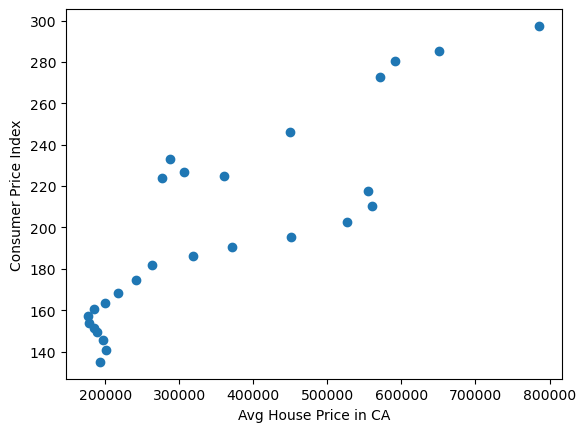

In [11]:
#Plotted New DF to Review Correlation
plt.scatter(df.avg_house_price, df.cpi_u)
plt.xlabel('Avg House Price in CA')
plt.ylabel('Consumer Price Index')
plt.show()

In [12]:
#Set X to CPI Values
X = df.cpi_u.values.reshape(-1, 1)

In [13]:
#Printed X List to Review
X[:5]

array([[135. ],
       [140.6],
       [145.6],
       [149.4],
       [151.5]])

In [14]:
#Reshaped X as Tuple
X.shape

(27, 1)

In [15]:
#Set Dependent Variable or 'Y' to Avg Housing Price
y = df.avg_house_price

In [16]:
#Set Model as LinearRegression
model = LinearRegression()

In [17]:
#Fit X and Y to Model
model.fit(X,y)

LinearRegression()

In [18]:
#Set Y Predict as Model Predict Using X
y_pred = model.predict(X)
print(y_pred.shape)

(27,)


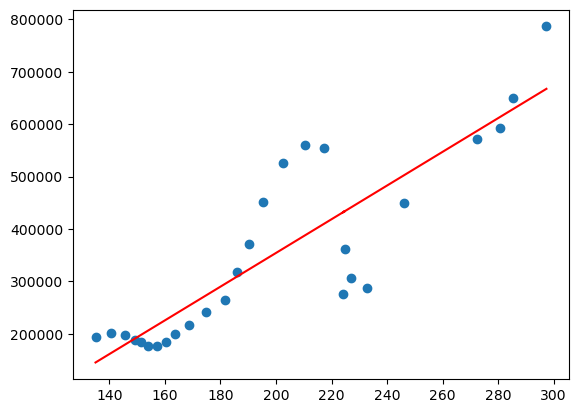

In [66]:
#Plotted Linear Regression Model
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()